In [1]:
import datetime
now = datetime.datetime.now()
from pymongo import MongoClient
from bson.objectid import ObjectId
con = MongoClient("localhost", 27017)
db=con.selfesteem
posts = db.posts
post_1 = {
    'name': 'RAHUL',
    'content': 'self-esteem',
    'review': 'positive, love'
}
post_2 = {
     'name': 'Rohith',
    'content': 'self-esteem',
    'review':  "less social conformity', 'eating disorders', 'inability accept compliments', 'inability see quarely fair"
}
post_3 = {
     'name': 'RAjan',
    'content': 'self-esteem',
    'review': "fully trust capacity solve problems hesitating failures difficulties ask others help need"
}
new_result = posts.insert_many([post_1, post_2, post_3])
print('Multiple posts: {0}'.format(new_result.inserted_ids))

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def cleanStr(string):
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()



Multiple posts: [ObjectId('5c0e0643f43ca0047fdac295'), ObjectId('5c0e0643f43ca0047fdac296'), ObjectId('5c0e0643f43ca0047fdac297')]


In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def removeStopwords(sentence):
    word_tokens = word_tokenize(sentence)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            
    
    return " ".join(str(e) for e in filtered_sentence)

In [3]:
fgd = open("positivese.txt")
fgd1 = fgd.readlines()
gdArr = []
for i in fgd1:
    gdArr.append(removeStopwords(cleanStr(i)))

fgd = open("negativeselfesteem.txt")
fgd1 = fgd.readlines()
adArr = []
for i in fgd1:
    adArr.append(removeStopwords(cleanStr(i)))

descArr = gdArr+adArr
print(gdArr)
print ("BREAK")
print (adArr)

gdLabel = ["POSITIVE"]*len(gdArr)

adLabel = ["NEGATTIVE"]*len(adArr)

print ("break2")
print(gdLabel)

print(len(gdLabel))
print(len(adLabel))

labelArr =gdLabel+adLabel



['guided divine supposed', 'life wonderful gift must enjoy iti look amazing smile best dress', 'full control eatmy body sacred place keep clean shape', 'job provides financial stability family needsi love doi good', 'blessed financial abundancei best doi love accept', 'radiate receive love respect', 'loved respected wherever go', 'unique talents abilities validation others', 'people see value services rewarded graciously', 'self reliant creative persistent whatever', 'deserve good', 'grateful wonderful things life', 'full loving healthy positive prosperous thoughts eventually convert life experiences', 'unique dreams aspirations unique need prove anyone', 'solution driven every problem chance grow', 'never alone pursuit success universe supports expected unexpected ways', 'prisoner past live moment way enjoy life fullest', 'tree power change see fit', 'responsible making choices decisions', 'selfish giving priority desires', 'every moment brings us choice choose happiness matter circum

In [4]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


X_train, X_test, y_train, y_test = train_test_split(descArr, labelArr, random_state = True)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = LinearSVC().fit(X_train_tfidf,y_train )


In [5]:
pos=0
neg=0
fgd1=[]
finding = posts.find({'content': 'self-esteem'})
for obj in finding:
    fgd1.append(obj["review"])   
print(len(fgd1))
for i in fgd1:
    xx=removeStopwords(cleanStr(i))
    pred=clf.predict(count_vect.transform([xx]))
    
    if pred =='NEGATTIVE':
        neg=neg+1
print(neg)   
self_esteem_score= neg
print((float(neg)/float(len(fgd1)))*5)



print(fgd1)


3
1
1.66666666667
[u'positive, love', u"less social conformity', 'eating disorders', 'inability accept compliments', 'inability see quarely fair", u'fully trust capacity solve problems hesitating failures difficulties ask others help need']


In [7]:
import wordcloud
from wordcloud import WordCloud

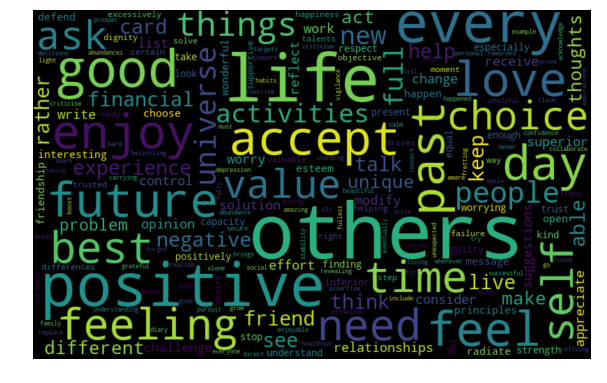

In [8]:
positive_words = ' '.join([text for text in gdArr])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

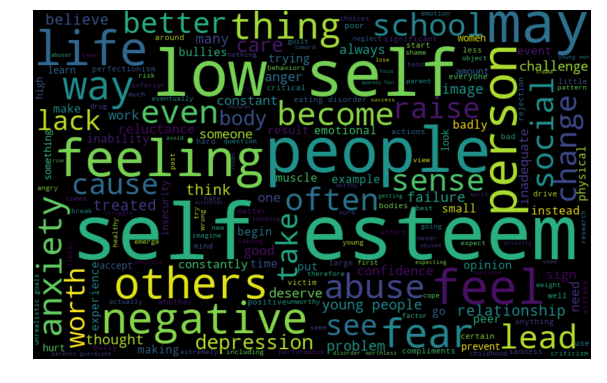

In [9]:
negative_words = ' '.join([text for text in adArr])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()